<a href="https://colab.research.google.com/github/Bahaakhalled/Insights-Failed-Orders-Gett-Strata/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
my_file = Path("data_orders.csv")
if my_file.is_file()==False:
  !wget 'https://raw.githubusercontent.com/Bahaakhalled/Insights-Failed-Orders-Gett-Strata/main/data_offers.csv'
  !wget 'https://raw.githubusercontent.com/Bahaakhalled/Insights-Failed-Orders-Gett-Strata/main/data_orders.csv'

--2022-09-27 10:18:16--  https://raw.githubusercontent.com/Bahaakhalled/Insights-Failed-Orders-Gett-Strata/main/data_offers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9027818 (8.6M) [text/plain]
Saving to: ‘data_offers.csv’

data_offers.csv     100%[===================>]   8.61M  41.2MB/s    in 0.2s    

2022-09-27 10:18:17 (41.2 MB/s) - ‘data_offers.csv’ saved [9027818/9027818]

--2022-09-27 10:18:17--  https://raw.githubusercontent.com/Bahaakhalled/Insights-Failed-Orders-Gett-Strata/main/data_orders.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

In [5]:
order=pd.read_csv('data_orders.csv')
offer=pd.read_csv('data_offers.csv')

order_datetime                    9921
origin_longitude                  4638
origin_latitude                   4507
m_order_eta                        292
order_gk                         10716
order_status_key                     2
is_driver_assigned_key               2
cancellations_time_in_seconds      772
dtype: int64

In [133]:
order_offer.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,Hour,got_offer
count,10716.000000,10716.000000,2814.000000,1.071600e+04,10716.000000,7307.000000,7610.000000,10716.000000,10716.000000
mean,-0.964323,51.450541,441.415423,3.000598e+12,0.262598,157.892021,4.108804,12.395110,0.710153
std,0.022818,0.011984,288.006379,2.396261e+07,0.440066,213.366963,2.456131,7.660695,0.453712
min,-1.066957,51.399323,60.000000,3.000550e+12,0.000000,3.000000,1.000000,0.000000,0.000000
25%,-0.974363,51.444643,233.000000,3.000583e+12,0.000000,45.000000,2.000000,7.000000,0.000000
50%,-0.966386,51.451972,368.500000,3.000595e+12,0.000000,98.000000,4.000000,13.000000,1.000000
75%,-0.949605,51.456725,653.000000,3.000623e+12,1.000000,187.500000,6.000000,20.000000,1.000000
max,-0.867088,51.496169,1559.000000,3.000633e+12,1.000000,4303.000000,9.000000,23.000000,1.000000


Outliers at order_Eta and cancellation time in seconds

In [11]:
offer=offer.groupby('order_gk').count().reset_index()

In [12]:
order_offer=order.merge(offer,how='outer', left_on='order_gk', right_on='order_gk')
order_offer = order_offer[order_offer['order_datetime'].notna()]

Task 1:Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection

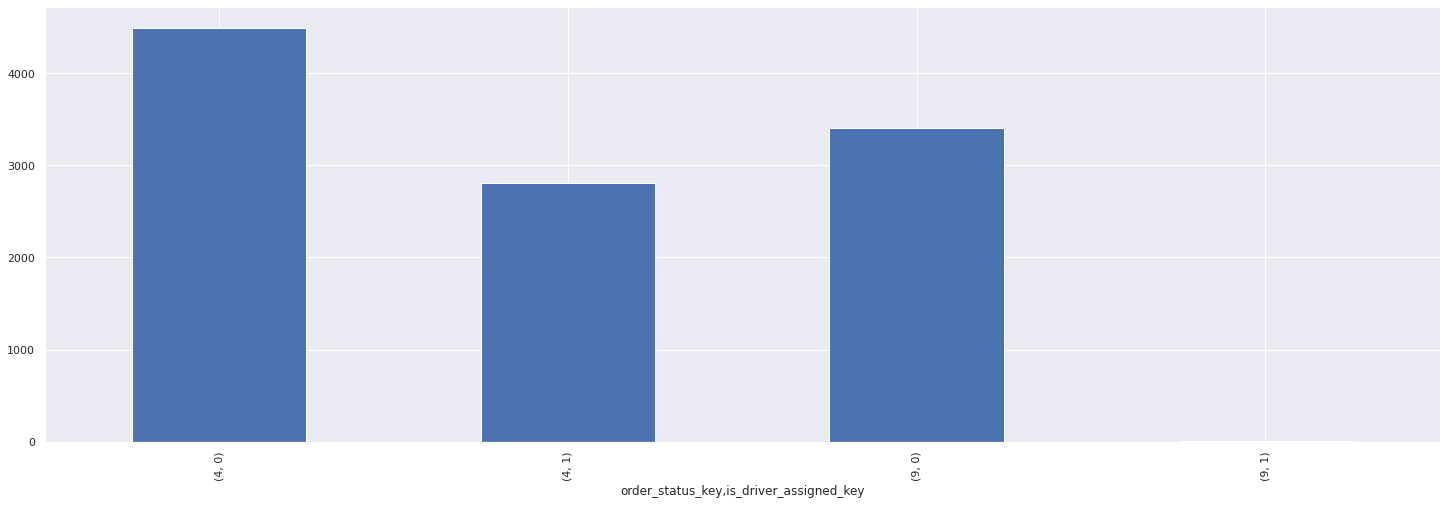

In [159]:
order.groupby(['order_status_key','is_driver_assigned_key']).order_gk.count().plot.bar()

Cancellatations by order:-

1)Client with no drivers assigned

2)Client with drivers assigned

3)System with no drivers assigned

Task 2:Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

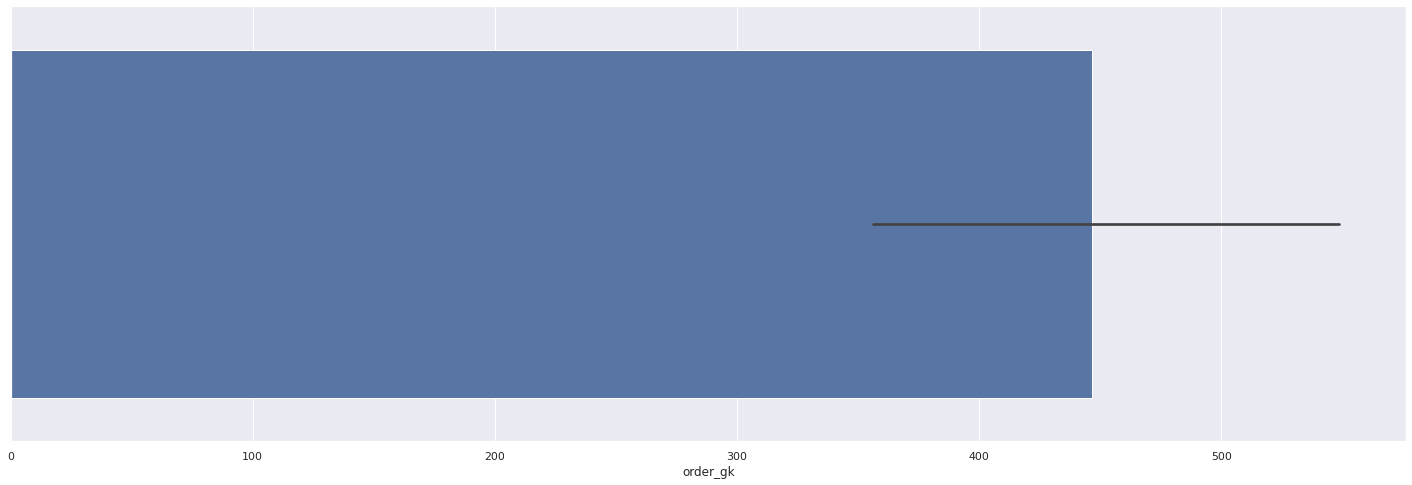

In [172]:
sns.barplot(x=order_offer.groupby('Hour').order_gk.count())
#.reset_index().Hour.plot.bar()

Text(0.5, 1.0, 'Hourly Cancellation Count')

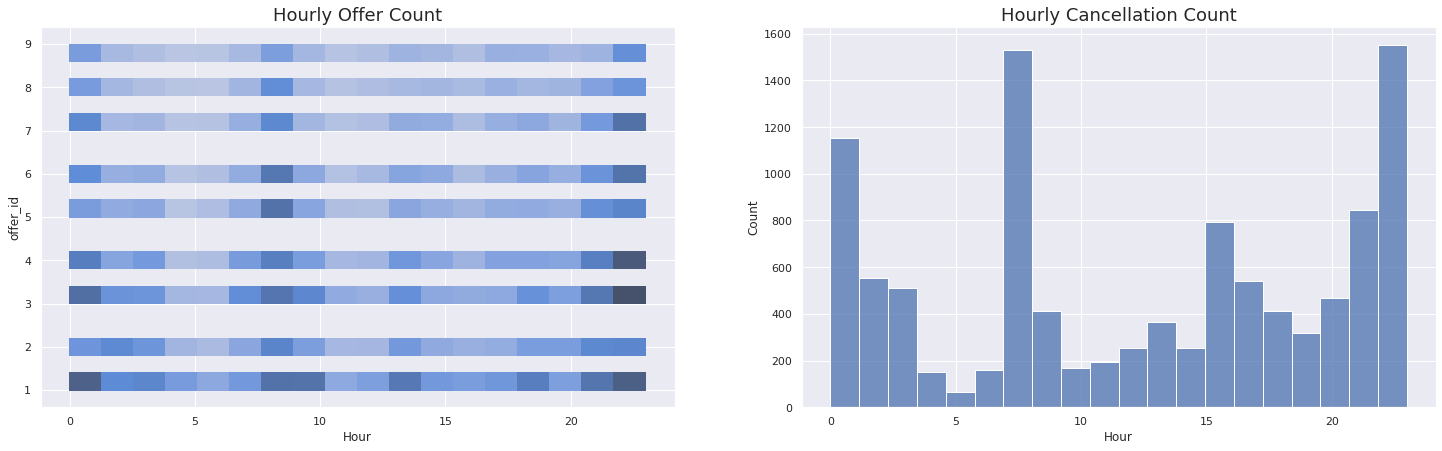

In [131]:
order_offer['Hour']=order_offer.order_datetime.str.split(':', 1,expand=True)[0].astype('int64')

plot , ax = plt.subplots(1 , 2 , figsize = (25 , 7))

sns.histplot(data=order_offer.sort_values(by='Hour',ascending=True), x="Hour", y="offer_id",ax=ax[0]).axes.set_title('Hourly Offer Count',fontsize=18)

sns.histplot(data=order_offer.sort_values(by='Hour',ascending=True), x="Hour",ax=ax[1]).axes.set_title('Hourly Cancellation Count',fontsize=18)

Based on the previous Graphs we found peak cancellations  on 

Text(0.5, 1.0, 'Hourly Average Cancellation Time per driver assignment')

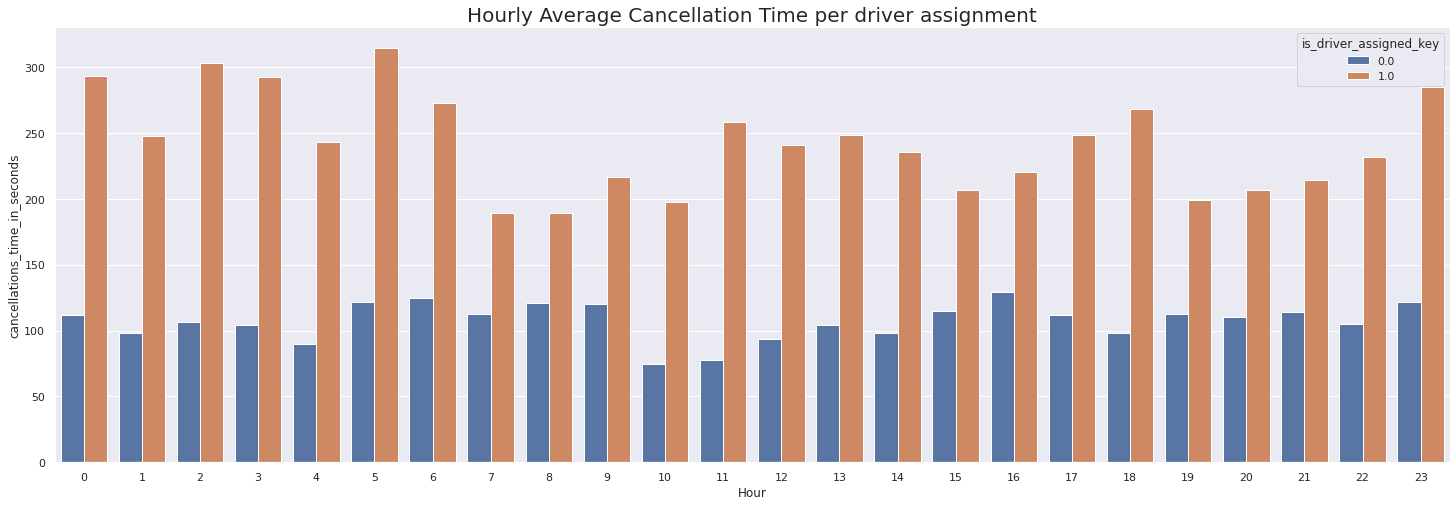

In [127]:
sns.barplot(data=order_offer.groupby(['Hour','is_driver_assigned_key']).cancellations_time_in_seconds.mean().reset_index(),x='Hour',y='cancellations_time_in_seconds',hue='is_driver_assigned_key').axes.set_title('Hourly Average Cancellation Time per driver assignment',fontsize=20)

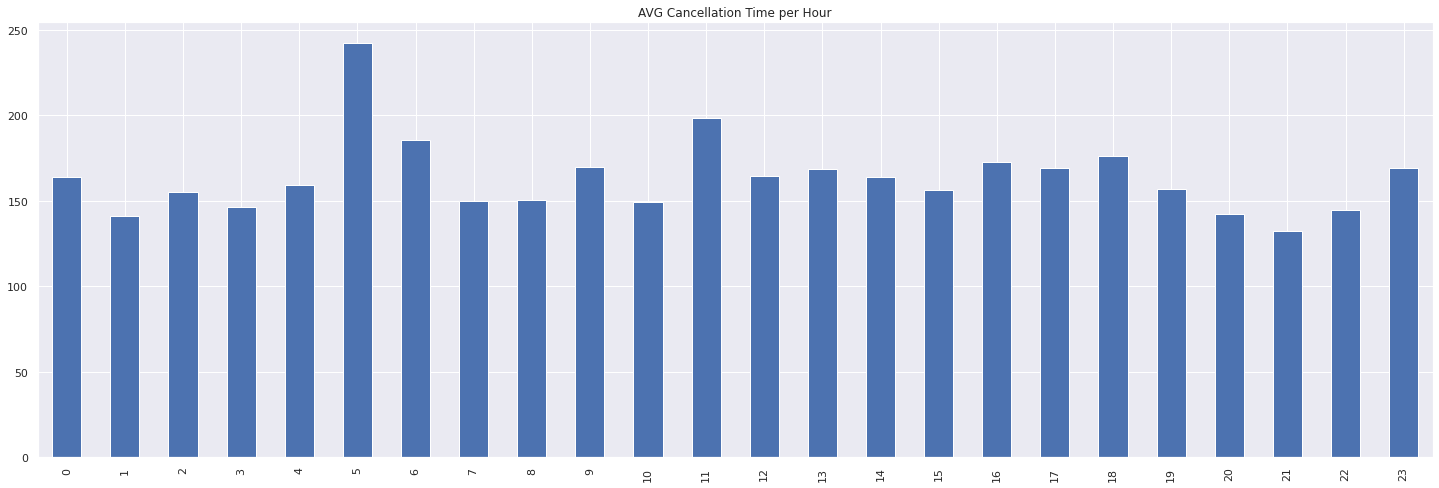

In [64]:
order_offer.groupby('Hour').cancellations_time_in_seconds.mean().reset_index().sort_values(by='Hour',ascending=True).cancellations_time_in_seconds.plot(kind='bar',title='AVG Cancellation Time per Hour')

In [15]:
order_offer['order_status_key']=order_offer.order_status_key.map(lambda m:'Client' if m==4 else 'System' )
order_offer['got_offer']=order_offer.offer_id.map(lambda m:1 if m>0 else 0 )

order_offer.groupby(['order_status_key','is_driver_assigned_key']).sum()

origin_longitude  origin_latitude  \
order_status_key is_driver_assigned_key                                      
Client           0.0                         -4336.798715    231323.005872   
                 1.0                         -2707.295188    144626.216720   
System           0.0                         -3286.671424    175240.402698   
                 1.0                            -2.922420       154.374164   

                                         m_order_eta           order_gk  \
order_status_key is_driver_assigned_key                                   
Client           0.0                             0.0  13490694397154540   
                 1.0                       1241367.0   8434669160015600   
System           0.0                             0.0  10220045065741036   
                 1.0                           776.0      9001861525196   

                                         cancellations_time_in_seconds  \
order_status_key is_driver_assigned_key                                  
Client           0.0                                          496230.0   
                 1.0                                          657487.0   
System           0.0                                               0.0   
                 1.0                                               0.0   

                                         offer_id   Hour  got_offer  
order_status_key is_driver_assigned_key                              
Client           0.0                      13435.0  57213       3367  
                 1.0                       8360.0  35192       2338  
System           0.0                       9469.0  40405       1903  
                 1.0                          4.0     16          2

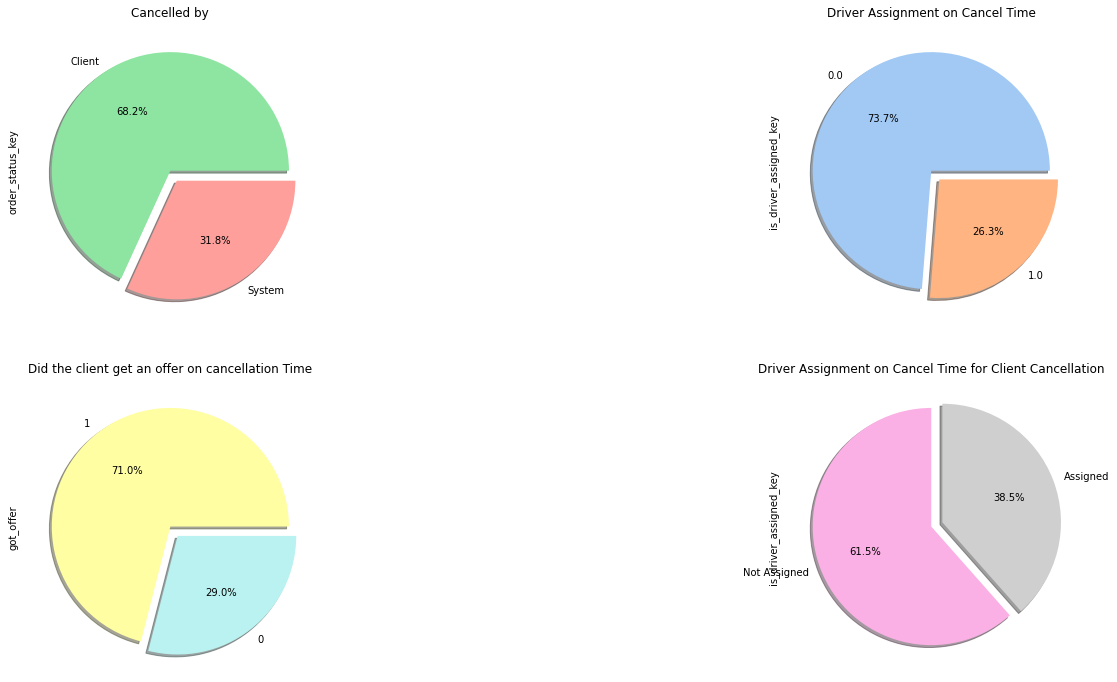

In [16]:
plot , ax = plt.subplots(2 , 2 , figsize = (25 , 12))

explode = (0, 0.1) 
order_offer.order_status_key.value_counts().plot.pie(autopct='%1.1f%%',colors = sns.color_palette('pastel')[2:4],shadow=True,explode=explode,ax=ax[0][0])
ax[0][0].title.set_text('Cancelled by')
order_offer.is_driver_assigned_key.value_counts().plot.pie(autopct='%1.1f%%',colors = sns.color_palette('pastel'),shadow=True,explode=explode,ax=ax[0][1])
ax[0][1].title.set_text('Driver Assignment on Cancel Time')
order_offer.got_offer.value_counts().plot.pie(autopct='%1.1f%%',colors = sns.color_palette('pastel')[8:10],shadow=True,explode=explode,ax=ax[1][0])

ax[1][0].title.set_text('Did the client get an offer on cancellation Time')

order_offer.loc[order_offer['order_status_key']=='Client'].is_driver_assigned_key.value_counts().plot.pie(labels=['Not Assigned','Assigned'],autopct='%1.1f%%',shadow=True,colors = sns.color_palette('pastel')[6:8], startangle=90,explode=explode,ax=ax[1][1])
ax[1][1].title.set_text('Driver Assignment on Cancel Time for Client Cancellation')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


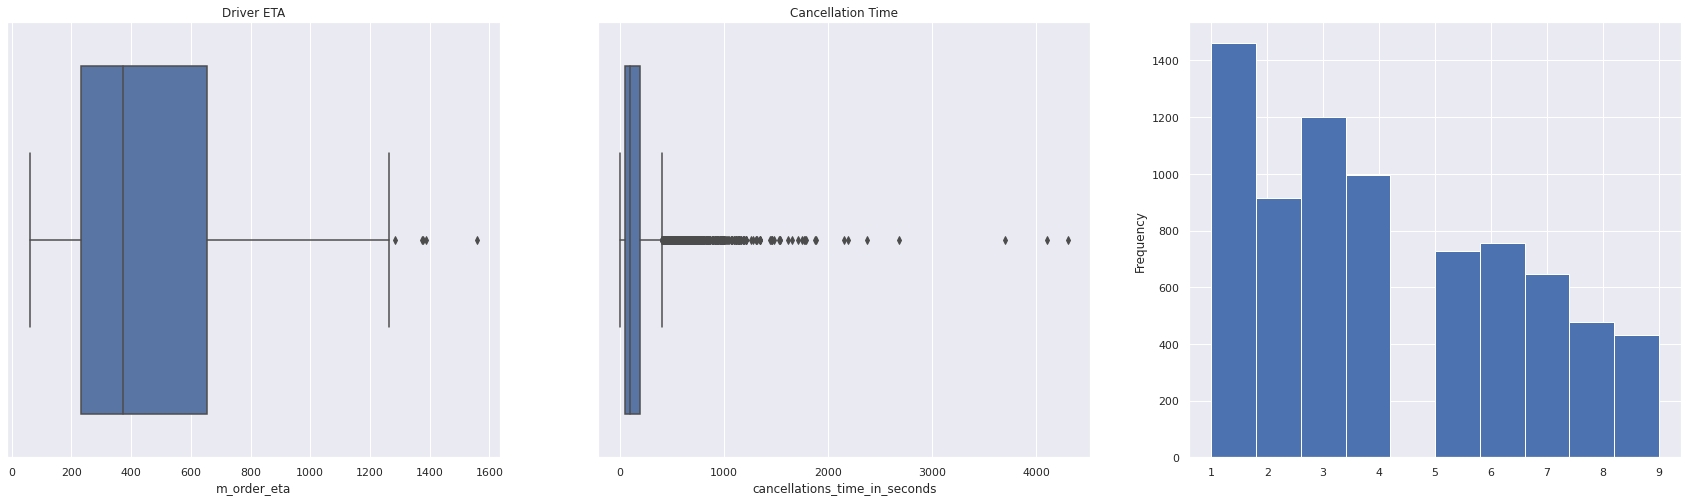

In [132]:
plot , ax = plt.subplots(1 , 3 , figsize = (30 , 8))
order_offer.offer_id.plot(kind='hist',ax=ax[2])
ax[0].title.set_text('Driver ETA')
sns.boxplot(order_offer.loc[order_offer['order_status_key']=='Client'].m_order_eta,ax=ax[0])
ax[1].title.set_text('Cancellation Time')
sns.boxplot(x=order_offer.loc[order_offer['order_status_key']=='Client'].cancellations_time_in_seconds,ax=ax[1])

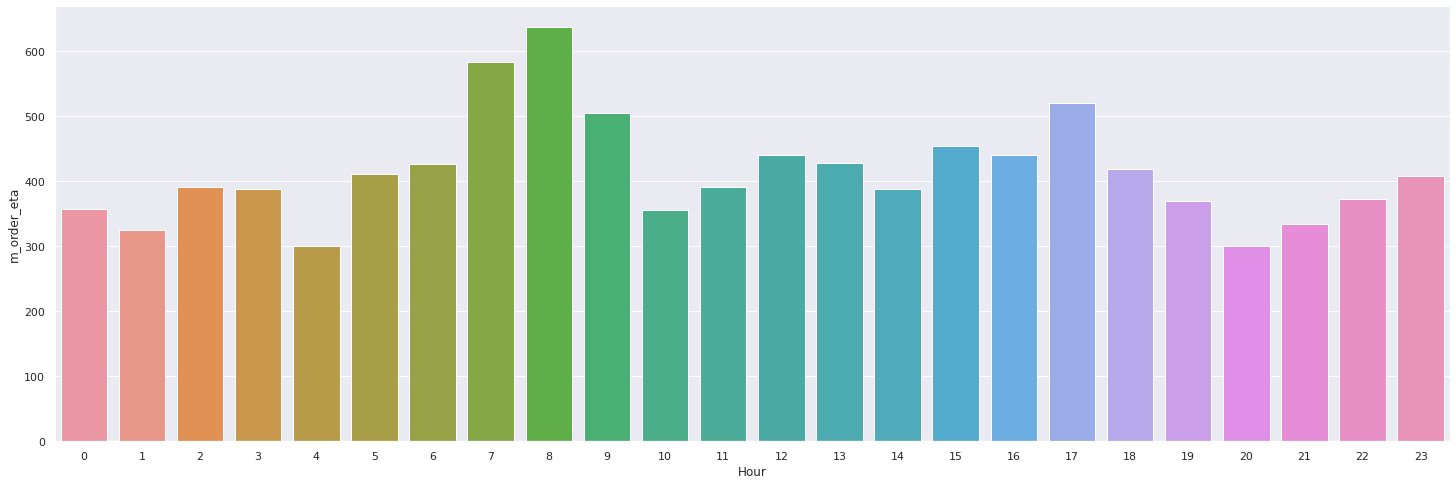

In [112]:
sns.set(rc={"figure.figsize":(25, 8)})
sns.barplot(data=order_offer.groupby('Hour').m_order_eta.mean().reset_index(), x="Hour", y="m_order_eta")

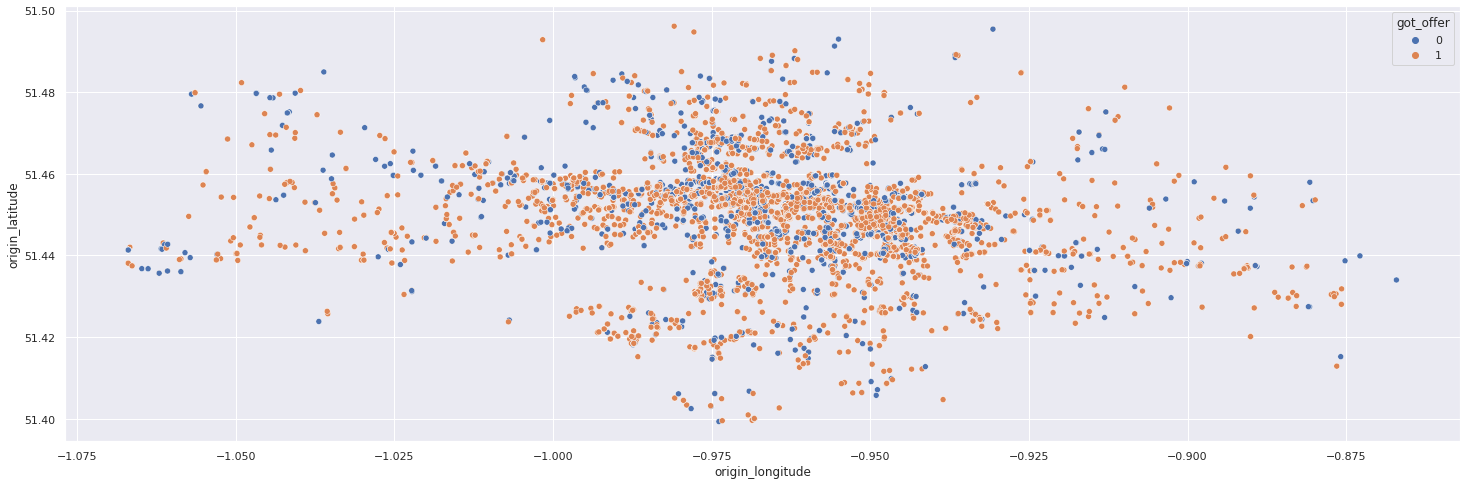

In [21]:
sns.scatterplot(data=order_offer, x="origin_longitude", y="origin_latitude",hue='got_offer')


In [22]:
order_offer.loc[order_offer['order_status_key']=='Client']['m_order_eta'].describe()

count    2811.000000
mean      441.610459
std       288.057123
min        60.000000
25%       233.000000
50%       372.000000
75%       653.500000
max      1559.000000
Name: m_order_eta, dtype: float64

Half of Client Cancellations are less than 6 minutes of waiting for order time

In [23]:
no_offer=order_offer.loc[order_offer['offer_id'].isnull()].reset_index(drop=True)
no_offer['Hour']=no_offer.order_datetime.str.split(':', 1,expand=True)[0].astype('int64')

In [24]:
no_offer['Timing']=no_offer.Hour.map(lambda m:'AM' if m<12 else 'PM' )
no_offer

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,Hour,got_offer,Timing
0,21:24:45,-0.967605,51.458236,NaN,3000583140877,System,0.0,NaN,NaN,21,0,PM
1,07:53:46,-0.978230,51.454575,NaN,3000582791562,System,0.0,NaN,NaN,7,0,AM
2,16:55:28,-0.950683,51.451368,538.0,3000583016613,Client,1.0,188.0,NaN,16,0,PM
3,00:04:16,-0.974519,51.454603,NaN,3000582541301,System,0.0,NaN,NaN,0,0,AM
4,08:49:02,-0.963172,51.454195,NaN,3000582817399,System,0.0,NaN,NaN,8,0,AM
...,...,...,...,...,...,...,...,...,...,...,...,...
3101,13:18:03,-0.972926,51.457693,NaN,3000599187042,Client,0.0,10.0,NaN,13,0,PM
3102,13:14:50,-0.975372,51.457846,NaN,3000599186984,Client,0.0,19.0,NaN,13,0,PM
3103,12:45:23,-0.975372,51.457846,NaN,3000597886178,Client,0.0,23.0,NaN,12,0,PM
3104,13:13:55,-0.975372,51.457846,NaN,3000599186962,Client,0.0,4.0,NaN,13,0,PM


cancellation time in sec skewed and order eta